# Common Task: Miami, FL
# By: Alex Marzban

## Initial Data Gathering

### National Weather Service

In [ ]:
response = requests.get("https://api.weather.gov/points/25.7617,-80.1918", headers={"User-Agent": "Bjmalexunited@yahoo.com"})
if response.status_code == 200:
    data = response.json()
    office = data['properties']['cwa']
    gridX = data['properties']['gridX']
    gridY = data['properties']['gridY']
    print(data)

# Fetch the hourly forecast using the grid information
hourly_forecast_url = f"https://api.weather.gov/gridpoints/{office}/{gridX},{gridY}/forecast/hourly"
response = requests.get(hourly_forecast_url, headers={"User-Agent": "Bjmalexunited@yahoo.com"})
if response.status_code == 200:
    hourly_data = response.json()
    # Process the hourly_data
    print(hourly_data)
    #store to json file
    with open('data.json', 'w') as outfile:
        json.dump(hourly_data, outfile)
def remove_alphabetical_columns_from_json(json_data):
    """
    Remove columns from a JSON object that contain only alphabetical characters.
    """
    # Load the JSON data into a Python object
    python_data = json.loads(json_data)
    
    # Convert the Python object to a DataFrame
    df = pd.DataFrame(python_data)
    
    # Identify columns to remove
    cols_to_remove = []
    for col in df.columns:
        if df[col].apply(lambda x: str(x).isalpha()).all():
            cols_to_remove.append(col)
            
    # Drop identified columns
    df_cleaned = df.drop(columns=cols_to_remove)
    
    # Convert the cleaned DataFrame back to JSON
    cleaned_json = df_cleaned.to_json(orient='records')
    
    return cleaned_json

def remove_non_numerical_from_json_automatic(json_data):
    """
    Remove non-numerical characters from columns that contain mixed data types in a JSON object.
        
    Returns:
        str: The cleaned JSON-formatted data.
    """
    # Load the JSON data into a Python object
    python_data = json.loads(json_data)
    
    # Convert the Python object to a DataFrame
    df = pd.DataFrame(python_data)
    
    # Automatically identify columns to clean
    columns_to_clean = []
    for col in df.columns:
        if df[col].apply(lambda x: any(char.isdigit() for char in str(x)) and any(char.isalpha() for char in str(x))).any():
            columns_to_clean.append(col)
    
    # Remove non-numerical characters from identified columns
    for col in columns_to_clean:
        df[col] = df[col].apply(lambda x: float(re.sub('[^0-9.]', '', str(x))))
    
    # Convert the cleaned DataFrame back to JSON
    cleaned_json = df.to_json(orient='records')
    
    return cleaned_json

def process_weather_data(json_data):
    processed_data = []
    for period in json_data['properties']['periods']:
        data_point = {
            "timestamp": period.get("startTime", None),
            "temperature": period.get("temperature", None),
            "temperatureUnit": period.get("temperatureUnit", None),
            "windSpeed": period.get("windSpeed", None),
            "windDirection": period.get("windDirection", None),
            "dewpoint": period.get("dewpoint", None),
            "probabilityOfPrecipitation": period.get("probabilityOfPrecipitation", None),
            "relativeHumidity": period.get("relativeHumidity", None),
        }
        processed_data.append(data_point)
    return remove_alphabetical_columns_from_json(json.dumps(processed_data))


# Load the JSON data from the file (assuming the file name is 'data.json')
with open('data.json', 'r') as infile:
    raw_data = json.load(infile)

# Process the data
processed_data = remove_non_numerical_from_json_automatic(process_weather_data(raw_data))

# Optionally, save the processed data to another JSON file
with open('processed_data.json', 'w') as outfile:
    json.dump(processed_data, outfile)

### Open Mateo Historical Weather Data

In [43]:
# NWS API
# Define the start and end parameters in the correct format
start_time = "2015-01-01"  
end_time = "2023-09-20"  


# Build the API URL
api_url = f"https://archive-api.open-meteo.com/v1/archive?latitude=25.7934&longitude=-80.29&start_date={start_time}&end_date={end_time}&hourly=temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,pressure_msl,surface_pressure,cloudcover,et0_fao_evapotranspiration,windspeed_10m,shortwave_radiation&temperature_unit=fahrenheit&windspeed_unit=mph&precipitation_unit=inch&timezone=America%2FNew_York"
# Make the API request
response = requests.get(api_url)

# Check the response
if response.status_code == 200:
    json_data = response.json()
    #save data
    hourly_df = pd.DataFrame(json_data['hourly'])
    #save to a file
    hourly_df.to_csv('MateoData.csv')
else:
    print("Failed:", response.json())


In [3]:
#last 10 rows
hourly_df = pd.read_csv('MateoData.csv')
hourly_df.tail(10)

,Unnamed: 0,time,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,pressure_msl,surface_pressure,cloudcover,et0_fao_evapotranspiration,windspeed_10m,shortwave_radiation
76430,76430,2023-09-20T14:00,80.1,81,73.8,0.055,1015.2,1015.0,62,0.011,4.9,390.0
76431,76431,2023-09-20T15:00,83.6,78,75.9,0.087,1014.6,1014.4,88,0.020,5.3,738.0
76432,76432,2023-09-20T16:00,81.6,82,75.4,0.083,1014.0,1013.8,79,0.013,6.8,453.0
76433,76433,2023-09-20T17:00,81.3,82,75.2,0.016,1013.3,1013.1,71,0.008,5.7,254.0
76434,76434,2023-09-20T18:00,81.2,82,75.4,0.000,1013.7,1013.5,56,0.004,4.5,127.0
76435,76435,2023-09-20T19:00,80.6,84,75.5,0.000,1013.8,1013.6,41,0.002,4.0,61.0
76436,76436,2023-09-20T20:00,79.2,89,75.6,0.020,1014.4,1014.2,62,0.001,3.5,3.0
76437,76437,2023-09-20T21:00,77.8,91,75.0,0.083,1015.3,1015.1,46,0.000,1.1,0.0
76438,76438,2023-09-20T22:00,77.4,91,74.5,0.031,1015.4,1015.2,37,0.000,0.5,0.0
76439,76439,2023-09-20T23:00,77.8,90,74.5,0.000,1015.5,1015.3,25,0.000,2.2,0.0


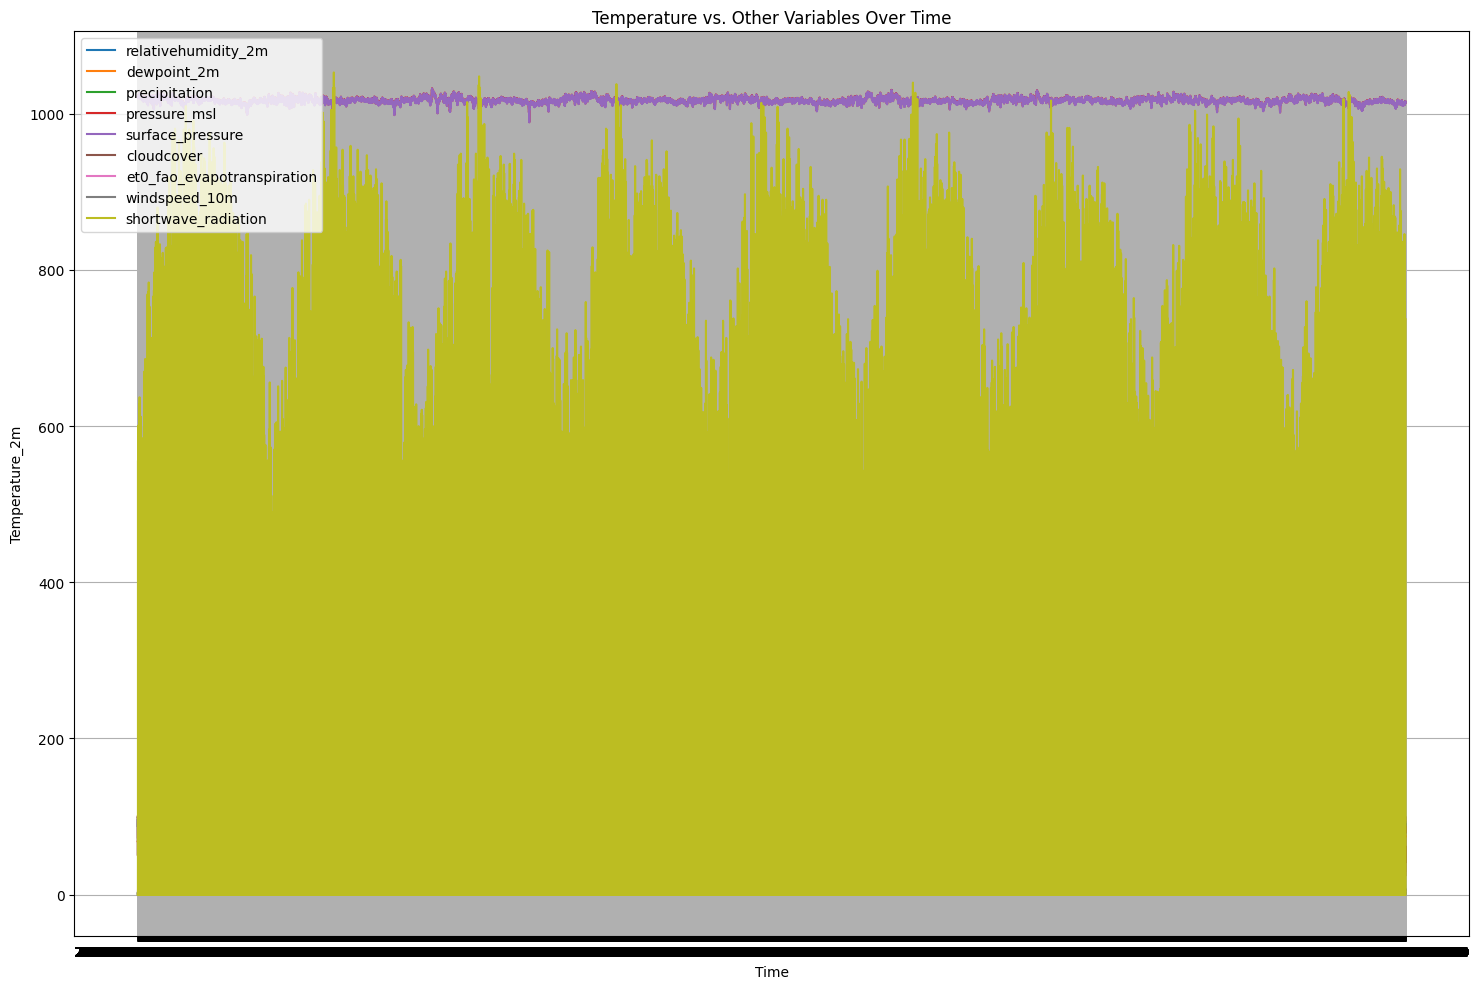

In [3]:
df = pd.read_csv('MateoData.csv')
columns_to_plot = ['relativehumidity_2m', 'dewpoint_2m', 'precipitation', 'pressure_msl', 'surface_pressure',
                   'cloudcover', 'et0_fao_evapotranspiration', 'windspeed_10m', 'shortwave_radiation']

# Plotting
plt.figure(figsize=(15, 10))

for column in columns_to_plot:
    plt.plot(df['time'], df[column], label=column)

plt.title("Temperature vs. Other Variables Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature_2m")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()

# Uncomment the below line to save the plot as an image
# plt.savefig("temperature_vs_other_variables.png")

plt.show()

### Open Mateo Forecast Data

In [5]:

# Build the API URL
api_url = f"https://api.open-meteo.com/v1/forecast?latitude=25.7934&longitude=-80.29&hourly=temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,windspeed_10m,shortwave_radiation&temperature_unit=fahrenheit&windspeed_unit=mph&precipitation_unit=inch&timezone=America%2FNew_York&start_date=2022-06-08&end_date=2023-10-14"
# Make the API request
response = requests.get(api_url)

# Check the response
if response.status_code == 200:
    json_data = response.json()
    #save data
    Forecastdf = pd.DataFrame(json_data['hourly'])

    Forecastdf[['date_local', 'time_local']] = Forecastdf['time'].str.split('T', expand=True)
    Forecastdf[['year', 'month', 'day']] = Forecastdf['date_local'].str.split('-', expand=True)   
    # drop time and date_local
    Forecastdf.drop(columns=['time', 'date_local'], inplace=True)
    #format time by removing :00
    Forecastdf['time_local'] = Forecastdf['time_local'].str.replace(':00', '')
    #save file
    Forecastdf.to_csv('ForecastData.csv')
else:
    print("Failed:", response.json())









In [34]:
Forecastdf = pd.read_csv('ForecastData.csv')


In [ ]:
df = pd.read_csv('ForecastData.csv')
columns_to_plot = ['relativehumidity_2m', 'dewpoint_2m', 'precipitation', 'windspeed_10m', 'shortwave_radiation']

# Plotting
plt.figure(figsize=(15, 10))

for column in columns_to_plot:
    plt.plot(df['time'], df[column], label=column)

plt.title("Temperature vs. Other Variables Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature_2m")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()

# Uncomment the below line to save the plot as an image
# plt.savefig("temperature_vs_other_variables.png")

plt.show()

### NOAA Ocean Water Temperature


In [84]:
# NOAA Ocean Temp API
oceandf = pd.DataFrame()

for i in range(2015, 2024):  # Looping from 2015 to 2023
    start_time = f"{i}0101"
    end_time = f"{i}1231" if i != 2023 else "20230920"

    api_url = f"https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=water_temperature&application=NOS.COOPS.TAC.PHYSOCEAN&begin_date={start_time}&end_date={end_time}&station=8723214&time_zone=GMT&units=english&interval=h&format=json"
    
    response = requests.get(api_url)
    
    if response.status_code == 200:
        json_data = response.json()
        hourly_df = pd.DataFrame(json_data['data'])
        
        # Remove column 'f' if it exists
        if 'f' in hourly_df.columns:
            hourly_df = hourly_df.drop(columns=['f'])
        
        # Append this year's data to the master DataFrame
        oceandf = pd.concat([oceandf, hourly_df], ignore_index=True)
        
    else:
        print(f"Failed for year {i}: ", response.json())

#change column name v to temp(f)
oceandf = oceandf.rename(columns={'v': 'temp(f)'})
#check how many values are non numerical
# Save the combined data to a CSV file
oceandf.to_csv('OceanTemp.csv', index=False)


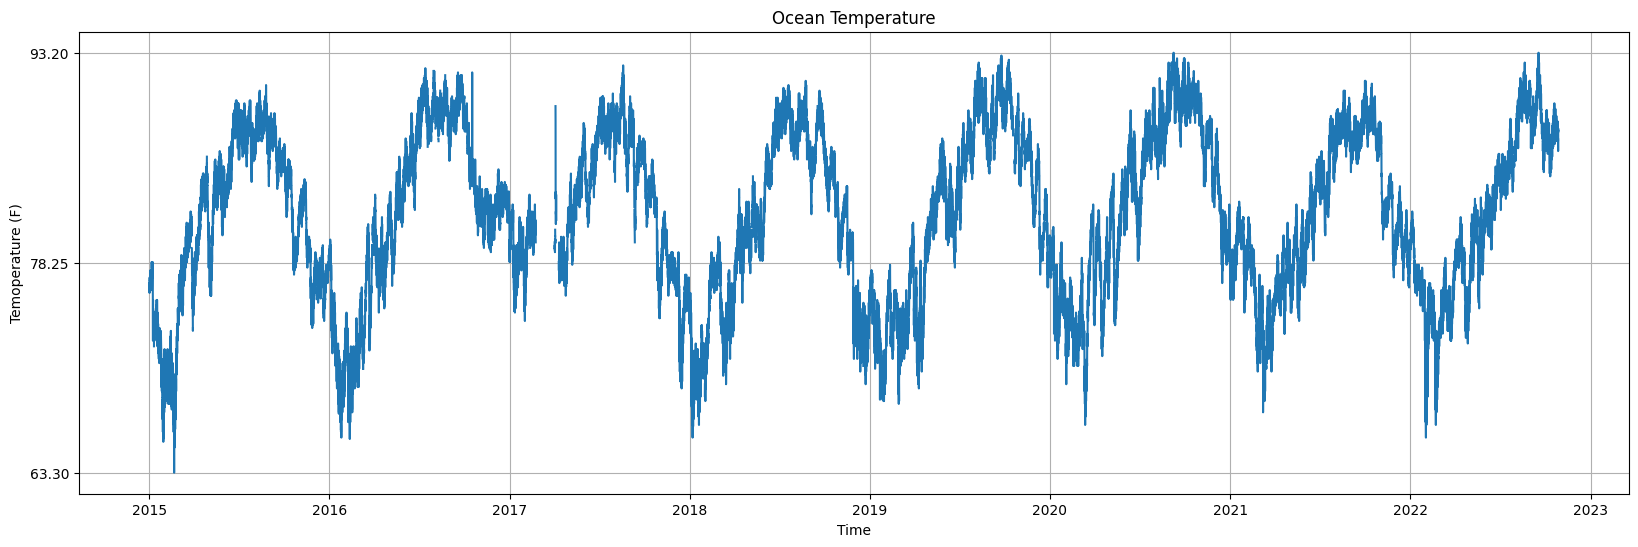

In [6]:
oceandf = pd.read_csv('OceanTemp.csv')
oceandf.tail(10)
df = oceandf
df['temp(f)'] = pd.to_numeric(df['temp(f)'], errors='coerce')
# Create a time index
time_index = pd.date_range(start='2015-01-01 00:00:00', periods=len(df), freq='H')

# Assign the time index to your DataFrame
df.index = time_index

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['temp(f)'])

# Setting the number of y-ticks
y_ticks = [min(df['temp(f)']), (min(df['temp(f)']) + max(df['temp(f)'])) / 2, max(df['temp(f)'])]
plt.yticks(y_ticks)

plt.xlabel('Time')
plt.ylabel('Temoperature (F)')
plt.title('Ocean Temperature')
plt.grid(True)
plt.show()

### NOAA Tide Levels


In [86]:
# NOAA Tide Height API
tidedf = pd.DataFrame()

for i in range(2015, 2024):  # Looping from 2015 to 2023
    start_time = f"{i}0101"
    end_time = f"{i}1231" if i != 2023 else "20230920"

    api_url = f"https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=hourly_height&application=NOS.COOPS.TAC.WL&begin_date={start_time}&end_date={end_time}&datum=MSL&station=8723214&time_zone=GMT&units=english&format=json"
    
    response = requests.get(api_url)
    
    if response.status_code == 200:
        json_data = response.json()
        hourly_df = pd.DataFrame(json_data['data'])
        
        # Remove column 'f' if it exists
        if 'f' in hourly_df.columns:
            hourly_df = hourly_df.drop(columns=['f'])

        # Remove column 's' if it exists
        if 's' in hourly_df.columns:
            hourly_df = hourly_df.drop(columns=['s'])
        
        # Append this year's data to the master DataFrame
        tidedf = pd.concat([tidedf, hourly_df], ignore_index=True)
        
    else:
        print(f"Failed for year {i}: ", response.json())
#change v to tide(ft)
tidedf = tidedf.rename(columns={'v': 'tide(ft)'})
# Save the combined data to a CSV file
tidedf.to_csv('TideHeight.csv', index=False)

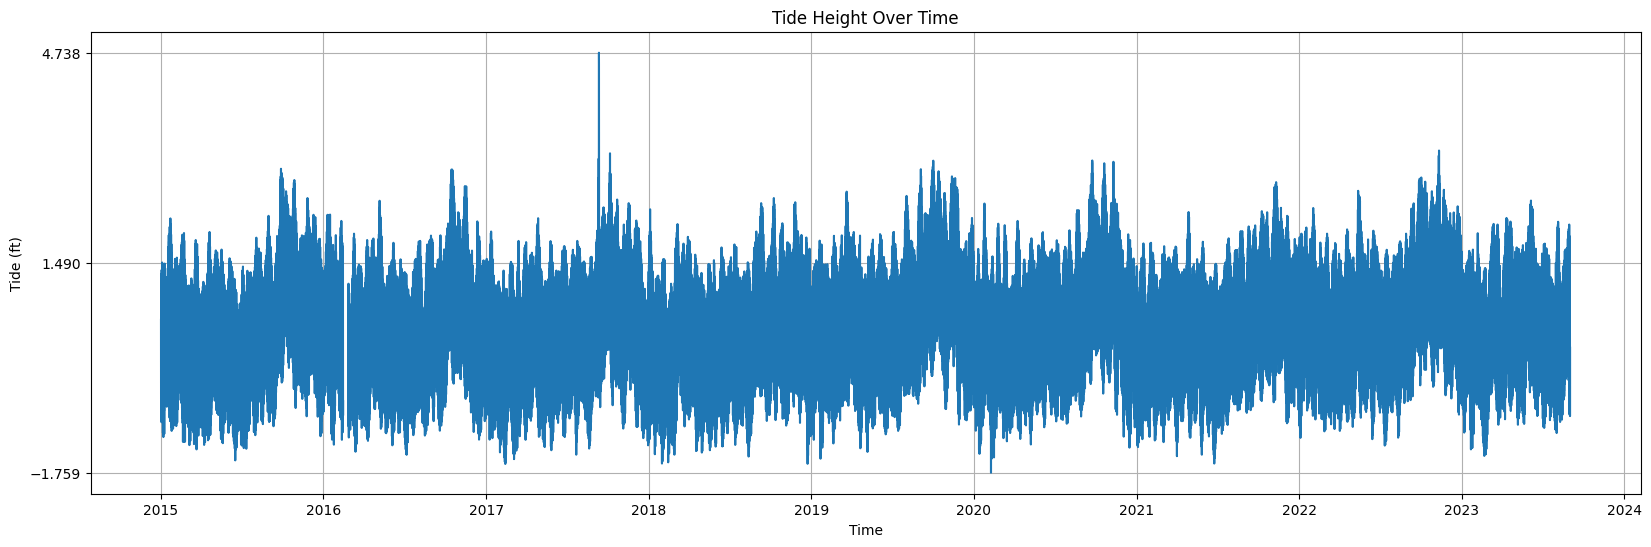

In [7]:
#last 10 rows
tidedf = pd.read_csv('TideHeight.csv')
tidedf.tail(10)
df = tidedf
df['tide(ft)'] = pd.to_numeric(df['tide(ft)'], errors='coerce')
# Create a time index
time_index = pd.date_range(start='2015-01-01 00:00:00', periods=len(df), freq='H')

# Assign the time index to your DataFrame
df.index = time_index

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['tide(ft)'])

# Setting the number of y-ticks
y_ticks = [min(df['tide(ft)']), (min(df['tide(ft)']) + max(df['tide(ft)'])) / 2, max(df['tide(ft)'])]
plt.yticks(y_ticks)

plt.xlabel('Time')
plt.ylabel('Tide (ft)')
plt.title('Tide Height Over Time')
plt.grid(True)
plt.show()

### PM 2.5 Data From the EPA

In [101]:
# PM 2.5 EPA API
# https://www.epa.gov/aqs/aqs-code-list
start_time = "20150101"
end_time = "20230920"
key = "tawnykit28"


# NOAA Tide Height API
aqidf = pd.DataFrame()

for i in range(2015, 2024):  # Looping from 2015 to 2023
    start_time = f"{i}0101"
    end_time = f"{i}1231" if i != 2023 else "20230920"

    api_url = f"https://aqs.epa.gov/data/api/sampleData/bySite?email=marza@bu.edu&key={key}&param=88101&bdate={start_time}&edate={end_time}&state=12&county=086&site=1016"
    
    response = requests.get(api_url)
    
    if response.status_code == 200:
        json_data = response.json()
        hourly_df = pd.DataFrame(json_data['Data'])
        
        # Append this year's data to the master DataFrame
        aqidf = pd.concat([aqidf, hourly_df], ignore_index=True)
        
    else:
        print(f"Failed for year {i}: ", response.json())
# Save the combined data to a CSV file
aqidf.to_csv('PM2.5.csv', index=False)

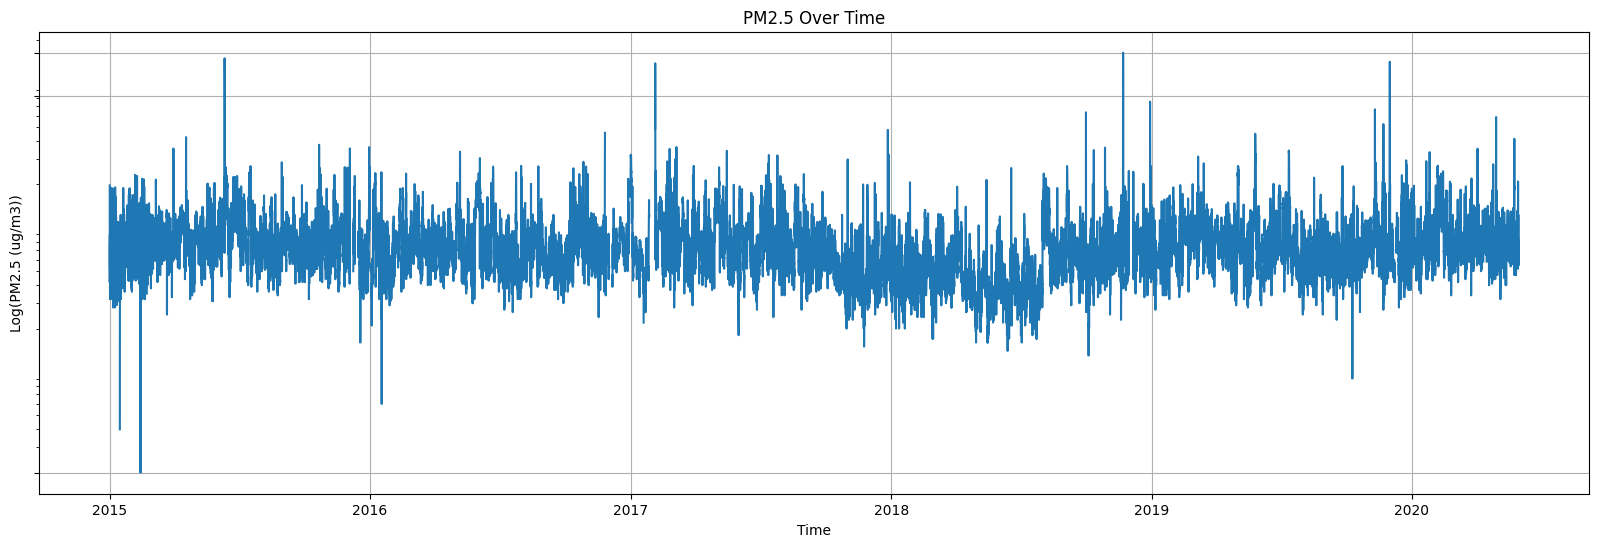

In [27]:
#last 10 rows
aqidf = pd.read_csv('PM2.5.csv')
aqidf.tail(10)
df = aqidf
df['sample_measurement'] = pd.to_numeric(df['sample_measurement'], errors='coerce')
# Create a time index
time_index = pd.date_range(start='2015-01-01 00:00:00', periods=len(df), freq='H')

# Assign the time index to your DataFrame
df.index = time_index

# Plotting
plt.figure(figsize=(20, 6))
#Log scale it
plt.yscale('log')
plt.plot(df.index, df['sample_measurement'])

# Setting the number of y-ticks
y_ticks = [min(df['sample_measurement']), (min(df['sample_measurement']) + max(df['sample_measurement'])) / 2, max(df['sample_measurement'])]
plt.yticks(y_ticks)

plt.xlabel('Time')
plt.ylabel('Log(PM2.5 (ug/m3))')
plt.title('PM2.5 Over Time')
plt.grid(True)
plt.show()


### Ozone from EPA

In [ ]:
# Ozone EPA API
key = "tawnykit28"


# NOAA Tide Height API
odf = pd.DataFrame()

for i in range(2015, 2024):  # Looping from 2015 to 2023
    start_time = f"{i}0101"
    end_time = f"{i}1231" if i != 2023 else "20230920"

    api_url = f"https://aqs.epa.gov/data/api/sampleData/bySite?email=marza@bu.edu&key={key}&param=44201&bdate={start_time}&edate={end_time}&state=12&county=086&site=0029"
    
    response = requests.get(api_url)
    if response.status_code == 200:
        json_data = response.json()
        hourly_df = pd.DataFrame(json_data['Data'])
        
        # Append this year's data to the master DataFrame
        odf = pd.concat([odf, hourly_df], ignore_index=True)
        
    else:
        print(f"Failed for year {i}: ", response.json())
# Save the combined data to a CSV file
odf.to_csv('Ozone.csv', index=False)

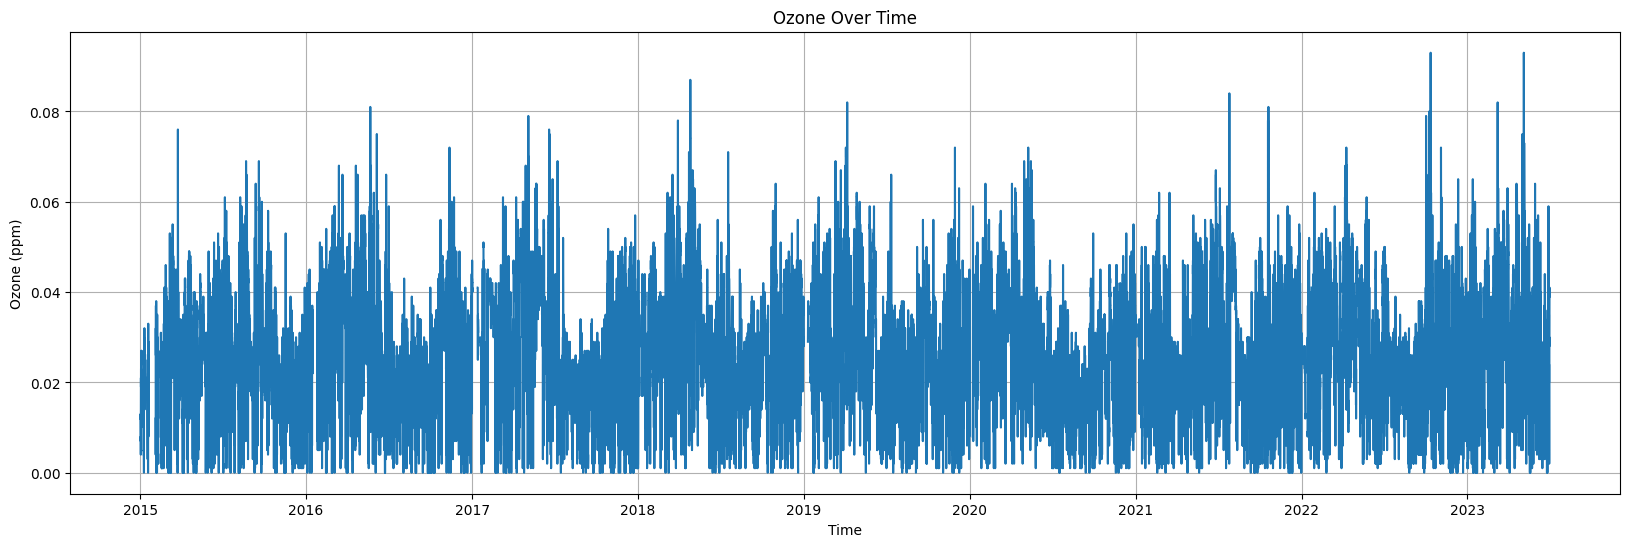

In [28]:
#last 10 rows
odf = pd.read_csv('Ozone.csv')
odf.tail(10)
df = odf
df['sample_measurement'] = pd.to_numeric(df['sample_measurement'], errors='coerce')
#remove nans

# Create a time index
time_index = pd.date_range(start='2015-01-01 00:00:00', periods=len(df), freq='H')

# Assign the time index to your DataFrame
df.index = time_index

# Plotting
plt.figure(figsize=(20, 6))

plt.plot(df.index, df['sample_measurement'])

# Setting the number of y-ticks

plt.xlabel('Time')
plt.ylabel('Ozone (ppm)')
plt.title('Ozone Over Time')
plt.grid(True)
plt.show()

## Combined Data Set

#### Create Time Variables

In [12]:
#import dfs
hourly_df = pd.read_csv('MateoData.csv')
Forecastdf = pd.read_csv('ForecastData.csv')
oceandf = pd.read_csv('OceanTemp.csv')
tidedf = pd.read_csv('TideHeight.csv')
aqidf = pd.read_csv('PM2.5.csv')
odf = pd.read_csv('Ozone.csv')

#split the time in oceantemp
oceandf[['date_local', 'time_local']] = oceandf['t'].str.split(' ', expand=True)
oceandf[['year', 'month', 'day']] = oceandf['date_local'].str.split('-', expand=True)

#split the time in tideheight
tidedf[['date_local', 'time_local']] = tidedf['t'].str.split(' ', expand=True)
tidedf[['year', 'month', 'day']] = tidedf['date_local'].str.split('-', expand=True)

#split the time in pm2.5
aqidf[['year', 'month', 'day']] = aqidf['date_local'].str.split('-', expand=True)

#split the time in ozone
odf[['year', 'month', 'day']] = odf['date_local'].str.split('-', expand=True)

#split the time in hourly
hourly_df[['date_local', 'time_local']] = hourly_df['time'].str.split('T', expand=True)
hourly_df[['year', 'month', 'day']] = hourly_df['date_local'].str.split('-', expand=True)

#### Combine

In [13]:
#combine data sets into one and save into a csv
combined_df = pd.merge(hourly_df, oceandf, how='left', on=['year', 'month', 'day', 'time_local'])
combined_df = pd.merge(combined_df, tidedf, how='left', on=['year', 'month', 'day', 'time_local'])
combined_df = pd.merge(combined_df, aqidf[['year', 'month', 'day', 'time_local', 'sample_measurement']], how='left', on=['year', 'month', 'day', 'time_local'])
combined_df = combined_df.rename(columns={'sample_measurement': 'pm2.5 (ug/m3)'})
combined_df = pd.merge(combined_df, odf[['year', 'month', 'day', 'time_local', 'sample_measurement']], how='left', on=['year', 'month', 'day', 'time_local'])
combined_df = combined_df.rename(columns={'sample_measurement': 'ozone (ppm)'})
#remove columns time, date_local_x, t_x, date_local, date_local_y
combined_df = combined_df.drop(columns=['date_local_x', 't_x', 'date_local_y', 'date_local', 't_y'])
#remove collon from local_time variable
combined_df['time_local'] = combined_df['time_local'].str.replace(':00', '')

#temperature_2m 	relativehumidity_2m dewpoint_2m 	precipitation 	windspeed_10m 	shortwave_radiation make the nans in this column 0  \
# Forecastdf.to_csv('ForecastData2.csv', index=False)
# Forecastdf = pd.read_csv('ForecastData2.csv')
Forecastdf['forecast_temp(f)'] = Forecastdf['temperature_2m'].astype(float).fillna(0)
Forecastdf['forecast_relativehumidity_2m'] = Forecastdf['relativehumidity_2m'].astype(float).fillna(0)
Forecastdf['forecast_dewpoint_2m'] = Forecastdf['dewpoint_2m'].astype(float).fillna(0)
Forecastdf['forecast_precipitation'] = Forecastdf['precipitation'].astype(float).fillna(0)
Forecastdf['forecast_windspeed_10m'] = Forecastdf['windspeed_10m'].astype(float).fillna(0)
Forecastdf['forecast_shortwave_radiation'] = Forecastdf['shortwave_radiation'].astype(float).fillna(0)
#remove excess columns
Forecastdf = Forecastdf.drop(columns=['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'precipitation', 'windspeed_10m', 'shortwave_radiation', 'Unnamed: 0'])
#save forecast df to csv
# Forecastdf.to_csv('ForecastData2.csv', index=False)
#change names of those columns to have forecast in front
#merge with forecast data
combined_df[['year', 'month', 'day', 'time_local']] = combined_df[['year', 'month', 'day', 'time_local']].astype('float')
Forecastdf[['year', 'month', 'day', 'time_local']] = Forecastdf[['year', 'month', 'day', 'time_local']].astype('float')
combined_df = pd.merge(combined_df, Forecastdf, how='left', on=['year', 'month', 'day', 'time_local'])
#fill nans with 0
combined_df = combined_df.fillna(0)
combined_df.to_csv('CombinedData.csv', index=False)

#### Interpolate Missing Data

In [27]:

df = combined_df = pd.read_csv('CombinedData.csv')
#count the number of nans
combined_df['time'] = pd.to_datetime(combined_df['time'])
combined_df = combined_df.set_index('time')
combined_df.interpolate(method='time', inplace=True)
#print columns
print(combined_df.isnull().sum())

Unnamed: 0                      0
temperature_2m                  0
relativehumidity_2m             0
dewpoint_2m                     0
precipitation                   0
pressure_msl                    0
surface_pressure                0
cloudcover                      0
et0_fao_evapotranspiration      0
windspeed_10m                   0
shortwave_radiation             0
time_local                      0
year                            0
month                           0
day                             0
temp(f)                         0
tide(ft)                        0
pm2.5 (ug/m3)                   0
ozone (ppm)                     0
forecast_temp(f)                0
forecast_relativehumidity_2m    0
forecast_dewpoint_2m            0
forecast_precipitation          0
forecast_windspeed_10m          0
forecast_shortwave_radiation    0
dtype: int64


## Data Exploration

### Linear Regression Analysis of Features

In [ ]:
# Assuming df is your DataFrame and it's already preprocessed
df = encode_features(combined_df)

numerical_cols = ['surface_pressure_5avg', 'relativehumidity_2m', 'dewpoint_2m', 'precipitation', 'pressure_msl','surface_pressure', 'cloudcover'
                       ,'et0_fao_evapotranspiration', 'windspeed_10m', 'shortwave_radiation', 'temp_avg','month' , 
                        'forecast_temp(f)', 'forecast_relativehumidity_2m', 'forecast_dewpoint_2m', 'forecast_precipitation', 
                        'forecast_windspeed_10m', 'forecast_shortwave_radiation']
target_col = 'temperature_2m'

# Shift all forecast data up 192 rows
df['target_7_days_ahead'] = df[target_col].shift(-192)
df['forecast_temp(f)'] = df['forecast_temp(f)'].shift(-192)
df['forecast_relativehumidity_2m'] = df['forecast_relativehumidity_2m'].shift(-192)
df['forecast_dewpoint_2m'] = df['forecast_dewpoint_2m'].shift(-192)
df['forecast_shortwave_radiation'] = df['forecast_shortwave_radiation'].shift(-192)
df['forecast_precipitation'] = df['forecast_precipitation'].shift(-192)
df['forecast_windspeed_10m'] = df['forecast_windspeed_10m'].shift(-192)

# Drop rows with NaN values in the specified columns
df.dropna(subset=feature_cols + ['target_7_days_ahead'], inplace=True)

# Extract feature matrix and target vector
X = df[feature_cols].values
y = df['target_7_days_ahead'].values

# Assuming you still want to slice from the 65,184th row
X = X[65184:]
y = y[65184:]

model_info = []

# Loop through each non-empty combination of features
for r in range(1, len(numerical_cols) + 1):
    for feature_subset in combinations(numerical_cols, r):
        
        feature_list = list(feature_subset)
        
        # Define X and y
        X = df[feature_list].values
        y = df[target_col].values
        
        # Split into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Initialize and fit the model with Ridge regularization
        model = Ridge(alpha=1.0)
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate MAE
        mae = mean_absolute_error(y_test, y_pred)

        #calculate the r2
        r2 = model.score(X_test, y_test)
        
        # Store the MAE and model
        model_info.append({
            'features': feature_list,
            'mae': mae,
            'model': model,
            'loss': r2
        })

        # Print the results
        print(f"Features: {feature_list}, MAE: {mae}", f"r2: {r2}")

# Find the model with the lowest MAE
best_model_info = min(model_info, key=lambda x: x['mae'])
print(f"The best model uses features {best_model_info['features']} with MAE {best_model_info['mae']}")

def predictRegression_and_plot(month, day, year, model):

    df_inputs = input(month, day,year)
    feature_cols = best_model_info['features']
    # Prepare the input features
    X = df_inputs[feature_cols].values
    
    # Initialize an empty list to store predicted temperatures
    predicted_temps = []
    
    for i in range(24):
        # Update DataFrame to represent the current hour, if applicable
        
        #grab the ith row of the dataframe
        X = df_inputs.iloc[[i]]
        #grab only the features
        X = X[feature_cols].values

        
        # Assuming the model is already loaded and compiled
        prediction = model.predict(X)[0]  # Reshape to match the input shape and take the first value
        predicted_temps.append(prediction)

    # Calculate the highest temperature for the day
    high_temp = max(predicted_temps)
    print()

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(range(24), predicted_temps, label='Predicted Temperatures', marker='o')
    plt.axhline(y=high_temp, color='r', linestyle='-', label=f'High Temp: {high_temp:.2f}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Temperature')
    plt.title('Hourly Temperature Predictions')
    plt.legend()
    plt.show()

# Example usage:
predictRegression_and_plot("09", "29", "2023", best_model_info['model'])

### Feature Correlation Map

<Axes: >

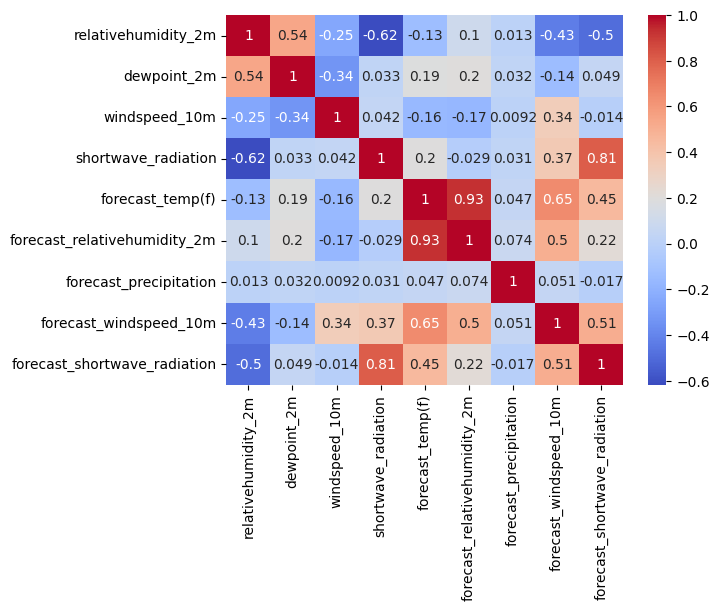

In [ ]:
# Assuming df is your DataFrame and feature_cols is your list of feature columns
df = pd.read_csv('CombinedData.csv')
df = pd.DataFrame(df, columns=feature_cols)  # Assuming X is your feature matrix
#10 months of data
df = df[-8760:]
feature_cols = ['relativehumidity_2m', 'dewpoint_2m',  
                'windspeed_10m', 'shortwave_radiation',
                'forecast_temp(f)', 'forecast_relativehumidity_2m', 'forecast_precipitation', 
                'forecast_windspeed_10m', 'forecast_shortwave_radiation']
correlation_matrix = df[feature_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

### PCA Analysis

Explained Variance:  [0.38968215 0.29929571 0.15737064 0.08840613 0.02825785]
Sorted component indices by explained variance:  [0 1 2 3 4]
Sorted explained variances:  [0.38968215 0.29929571 0.15737064 0.08840613 0.02825785]


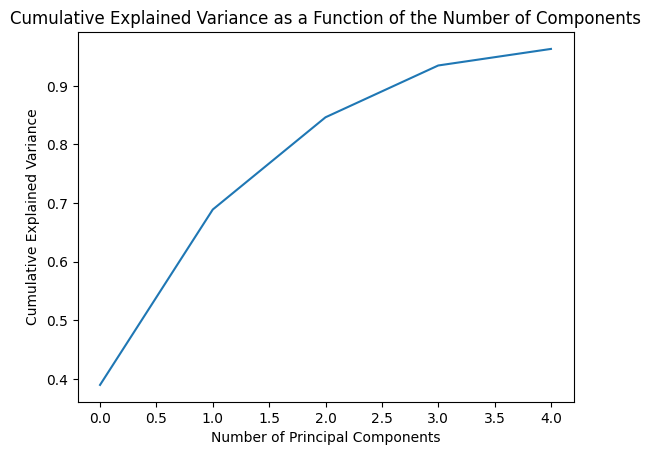

In [ ]:
from sklearn.decomposition import PCA
X_standardized = StandardScaler().fit_transform(df[feature_cols])

# Initialize PCA and the X vector for dimensionality reduction
pca = PCA(n_components=5)
# Fit the PCA model to your data
#only use last year of data
X = X_standardized[-8760:]
pca.fit(X)

# Get the explained variance
explained_variance = pca.explained_variance_ratio_

# Print the explained variance
print("Explained Variance: ", explained_variance)

# Sort the explained variances and their corresponding component indices
sorted_indices = np.argsort(explained_variance)[::-1]

# Print the sorted indices
print("Sorted component indices by explained variance: ", sorted_indices)

# Print the sorted explained variances
print("Sorted explained variances: ", explained_variance[sorted_indices])
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot
plt.figure()
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.show()

### Feature Mean, STD, Skew, Kurtosis and more

       relativehumidity_2m  dewpoint_2m  windspeed_10m  shortwave_radiation  \
count          8760.000000  8760.000000    8760.000000          8760.000000   
mean             76.907877    69.055297       7.843516           211.669064   
std              12.021315     7.208439       4.200012           280.805228   
min              32.000000    31.000000       0.000000             0.000000   
25%              69.000000    65.500000       4.900000             0.000000   
50%              78.000000    69.800000       7.200000             9.000000   
75%              87.000000    74.700000      10.300000           429.000000   
max              99.000000    80.400000      31.500000          1028.000000   

       forecast_temp(f)  forecast_relativehumidity_2m  forecast_precipitation  \
count       8760.000000                   8760.000000             8760.000000   
mean          56.773174                     53.832763                0.006198   
std           36.209467                     3

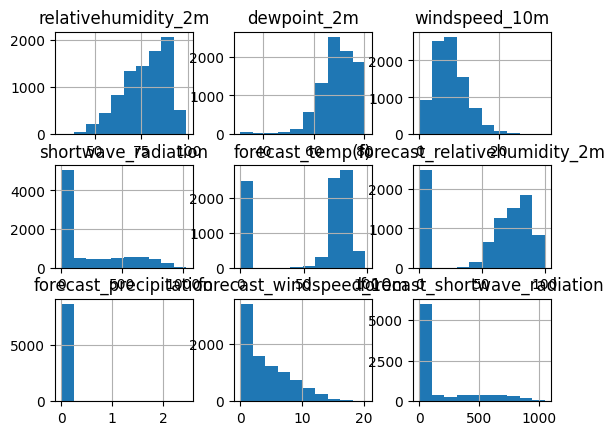

Skewness:  relativehumidity_2m             -0.590349
dewpoint_2m                     -1.524301
windspeed_10m                    0.957924
shortwave_radiation              1.003510
forecast_temp(f)                -0.873166
forecast_relativehumidity_2m    -0.681898
forecast_precipitation          19.848180
forecast_windspeed_10m           0.812134
forecast_shortwave_radiation     1.478446
dtype: float64
Kurtosis:  relativehumidity_2m              -0.253424
dewpoint_2m                       4.323818
windspeed_10m                     1.658529
shortwave_radiation              -0.438093
forecast_temp(f)                 -1.120476
forecast_relativehumidity_2m     -1.221539
forecast_precipitation          482.245025
forecast_windspeed_10m           -0.126005
forecast_shortwave_radiation      0.811738
dtype: float64


In [ ]:
#read csv
df = pd.read_csv("CombinedData.csv")
df = pd.DataFrame(df, columns=feature_cols)  # Assuming X is your feature matrix
#10 months of data
df = df[-8760:]
print(df.describe())

df.hist()
plt.show()

print("Skewness: ", df.skew())
print("Kurtosis: ", df.kurt())


## Models

### Encoding


In [3]:
def encode_features(df):
    #make float all columns
    df = df.astype(float)
    # Encode time variables using sine and cosine functions
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)
    df['year'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())  # Min-max scaling
    
    # Assume time is in 24-hour format, i.e., 0-23
    df['hour_sin'] = np.sin(2 * np.pi * df['time_local'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['time_local'] / 24)

    # add temperature moving average over the same hour of the day
    df['temp_avg'] = df['temperature_2m'].rolling(window=15).mean()
    df['temp_avg'] = df['temp_avg'].fillna(df['temperature_2m'])

    #surface_pressure_3avg
    df['surface_pressure_5avg'] = df['surface_pressure'].rolling(window=5).mean()
    
    # Standardize other numerical columns
    scaler = StandardScaler()
    
   #add forecast data to this ['relativehumidity_2m', 'dewpoint_2m', 'precipitation', 'pressure_msl','surface_pressure', 'cloudcover', 'et0_fao_evapotranspiration', 'windspeed_10m', 'shortwave_radiation', 'temp_avg','month']    
    numerical_cols =   ['surface_pressure_5avg', 'relativehumidity_2m', 'dewpoint_2m', 'precipitation', 'pressure_msl','surface_pressure', 'cloudcover'
                       ,'et0_fao_evapotranspiration', 'windspeed_10m', 'shortwave_radiation', 'temp_avg','month' , 
                        'forecast_temp(f)', 'forecast_relativehumidity_2m', 'forecast_dewpoint_2m', 'forecast_precipitation', 
                        'forecast_windspeed_10m', 'forecast_shortwave_radiation']
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    return df

# Simulate your DataFrame, replace this with your real DataFrame
# df = pd.read_csv('your_dataset.csv')



In [5]:
print(combined_df.iloc[70550])

Unnamed: 0                      70191.000
temperature_2m                     79.400
relativehumidity_2m                70.000
dewpoint_2m                        69.000
precipitation                       0.000
pressure_msl                     1019.400
surface_pressure                 1019.200
cloudcover                         41.000
et0_fao_evapotranspiration          0.015
windspeed_10m                      11.500
shortwave_radiation               564.000
time_local                         15.000
year                             2023.000
month                               1.000
day                                 3.000
temp(f)                            75.000
tide(ft)                            0.289
pm2.5 (ug/m3)                       5.100
ozone (ppm)                         0.029
forecast_temp(f)                   79.400
forecast_relativehumidity_2m       69.000
forecast_dewpoint_2m               68.300
forecast_precipitation              0.000
forecast_windspeed_10m            

### Second Week Model

In [28]:
#print 65184 row of combined_df
df = combined_df.shift(-70550)
#remove empty rows
df = df.dropna()
df = encode_features(combined_df)

feature_cols = ['relativehumidity_2m', 'dewpoint_2m',  
                        'windspeed_10m', 'shortwave_radiation', 'temp_avg',
                        'forecast_temp(f)', 'forecast_relativehumidity_2m', 'forecast_precipitation', 
                        'forecast_windspeed_10m', 'forecast_shortwave_radiation']
target_col = 'temperature_2m'

# Shift all forecast data up 192 rows
df['target_7_days_ahead'] = df[target_col].shift(-192)
df['forecast_temp(f)'] = df['forecast_temp(f)'].shift(-192)
df['forecast_relativehumidity_2m'] = df['forecast_relativehumidity_2m'].shift(-192)
df['forecast_dewpoint_2m'] = df['forecast_dewpoint_2m'].shift(-192)
df['forecast_shortwave_radiation'] = df['forecast_shortwave_radiation'].shift(-192)
df['forecast_precipitation'] = df['forecast_precipitation'].shift(-192)
df['forecast_windspeed_10m'] = df['forecast_windspeed_10m'].shift(-192)

# Drop rows with NaN values in the specified columns
df.dropna(subset=feature_cols + ['target_7_days_ahead'], inplace=True)

# Extract feature matrix and target vector
X = df[feature_cols].values
y = df['target_7_days_ahead'].values



# Custom loss function
def custom_loss(punishment_factor):
    def loss(y_true, y_pred):
        error = y_pred - y_true
        is_underestimation = K.less(y_pred, y_true)
        squared_error = K.square(error)
        return K.mean(K.switch(is_underestimation, punishment_factor * squared_error, squared_error))
    return loss

# Create RNN model
def create_model(drop1, drop2):
    model = Sequential()
    model.add(LSTM(64, activation='tanh', input_shape=(None, len(feature_cols)), return_sequences=True))
    model.add(Dropout(drop1))
    model.add(LSTM(32, activation='tanh'))
    model.add(Dropout(drop2))
    model.add(Dense(1))
    return model

best_mae = float('inf')
best_params = None

# Loop through different hyperparameters
for k in [5, 10]:  # Number of splits in TimeSeriesSplit
    # for drop1 in np.arange(0.1, 0.5, 0.1):  # Dropout rate for the first layer
    #     for drop2 in np.arange(0.1, 0.5, 0.1):
        
    drop1 = .25
    drop2 = .25
    punish = 3
    
    tscv = TimeSeriesSplit(n_splits=k)
    
    local_best_mae = float('inf')  # Local variable to store the best MAE for this configuration
    
    for train_index, test_index in tscv.split(X):
        # Reshape to 3D array for LSTM
        X_train, X_test = X[train_index], X[test_index]
        X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
        X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
        
        y_train, y_test = y[train_index], y[test_index]
        
        model = create_model(drop1, drop2)
        model.compile(optimizer='adam', loss='mae', metrics=['mae'])
        model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)
        
        loss, mae = model.evaluate(X_test, y_test, verbose=0)
        
        if mae < local_best_mae:
            local_best_mae = mae
    
    print(f"Configuration - k: {k}, drop1: {drop1}, drop2: {drop2}, MAE: {local_best_mae}", "loss: ", loss)
    
    if local_best_mae < best_mae:
        best_mae = local_best_mae
        best_rnn_model = model
        best_params = {'k': k, 'drop1': drop1, 'drop2': drop2}

print(f"The best MAE is {best_mae} with parameters {best_params}")

# Save the best model
#best_rnn_model.save('./Model/best_rnn_model.keras')

Configuration - k: 5, drop1: 0.25, drop2: 0.25, MAE: 3.083036184310913 loss:  28.30223274230957
Configuration - k: 10, drop1: 0.25, drop2: 0.25, MAE: 2.8443057537078857 loss:  47.61030197143555
The best MAE is 2.8443057537078857 with parameters {'k': 10, 'drop1': 0.25, 'drop2': 0.25}


### Generate Input Parameters for Model Evaluation and Usage


In [4]:
def input(month, day, year):
    
    #query for the Mateo data
    # NOAA Tide Height API


    #time
    start_time = f"{year}{month}{day}"
    start_time = pd.to_datetime(start_time) - pd.DateOffset(days=8)
    start_time = start_time.strftime("%Y%m%d")

    #ocean temp
    oceandf = pd.DataFrame()
    api_url = f"https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=water_temperature&application=NOS.COOPS.TAC.PHYSOCEAN&begin_date={start_time}&end_date={start_time}&station=8723214&time_zone=GMT&units=english&interval=h&format=json"
    response = requests.get(api_url)

    if response.status_code == 200:
        json_data = response.json()
        oceandf = pd.DataFrame(json_data['data'])
        oceandf[['date_local', 'time_local']] = oceandf['t'].str.split(' ', expand=True)
        oceandf[['year', 'month', 'day']] = oceandf['date_local'].str.split('-', expand=True)
        oceandf = oceandf.drop(columns=['date_local'])
        #change name of column to tide(ft)
        oceandf = oceandf.rename(columns={'v': 'temp(f)'})
    else:
        print("Error with Ocean Temp API")
        print (response.json())
    
    
    #Mateo
    # NWS API
    # Define the start and end parameters in the correct format
    hourly_df = pd.DataFrame()
    start_time = f"{year}{month}{day}"
    #8 days ahead
    start_time = pd.to_datetime(start_time) - pd.DateOffset(days=8)
    start_time = start_time.strftime("%Y-%m-%d")


    # Build the API URL
    api_url = f"https://archive-api.open-meteo.com/v1/archive?latitude=25.7934&longitude=-80.29&start_date={start_time}&end_date={start_time}&hourly=temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,pressure_msl,surface_pressure,cloudcover,et0_fao_evapotranspiration,windspeed_10m,shortwave_radiation&temperature_unit=fahrenheit&windspeed_unit=mph&precipitation_unit=inch&timezone=America%2FNew_York"
    # Make the API request
    response = requests.get(api_url)

    if response.status_code == 200:
        json_data = response.json()
        #save data
        mateo = pd.DataFrame(json_data['hourly'])
        #split the time in hourly
        mateo[['date_local', 'time_local']] = mateo['time'].str.split('T', expand=True)
        mateo[['year', 'month', 'day']] = mateo['date_local'].str.split('-', expand=True)
        #remove column date_local, time
        mateo = mateo.drop(columns=['date_local', 'time'])
    else:
        print("Error with Mateo API")

    #add code for forecast data, open mateo, api_url = f"https://api.open-meteo.com/v1/forecast?latitude=25.7934&longitude=-80.29&hourly=temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,windspeed_10m,shortwave_radiation&temperature_unit=fahrenheit&windspeed_unit=mph&precipitation_unit=inch&timezone=America%2FNew_York&start_date=2022-06-09&end_date=2023-10-15", response = requests.get(api_url)
    #save data
    Forecastdf = pd.DataFrame()
    #start time is current day
    start_time = f"{year}-{month}-{day}"
    # Build the API URL
    api_url = f"https://api.open-meteo.com/v1/forecast?latitude=25.7934&longitude=-80.29&hourly=temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,windspeed_10m,shortwave_radiation&temperature_unit=fahrenheit&windspeed_unit=mph&precipitation_unit=inch&timezone=America%2FNew_York&start_date={start_time}&end_date={start_time}"
    # Make the API request
    response = requests.get(api_url)
    if response.status_code == 200:
        json_data = response.json()
        Forecastdf = pd.DataFrame(json_data['hourly'])
        #split the time in hourly
        Forecastdf[['date_local', 'time_local']] = Forecastdf['time'].str.split('T', expand=True)
        Forecastdf[['year', 'month', 'day']] = Forecastdf['date_local'].str.split('-', expand=True)
        #remove column date_local, time
        Forecastdf = Forecastdf.drop(columns=['date_local', 'time'])
        Forecastdf = Forecastdf.rename(columns={'temperature_2m': 'forecast_temp(f)', 'relativehumidity_2m': 'forecast_relativehumidity_2m', 'dewpoint_2m': 'forecast_dewpoint_2m', 'precipitation': 'forecast_precipitation', 'windspeed_10m': 'forecast_windspeed_10m', 'shortwave_radiation': 'forecast_shortwave_radiation'})
    else:
        print("Error with Mateo Forecast API")

    
    combined_df = pd.merge(mateo, oceandf, how='left', on=['year', 'month', 'day', 'time_local'])
    combined_df = pd.merge(combined_df, Forecastdf, how='left', on=['year', 'month', 'day', 'time_local'])
    combined_df['time_local'] = combined_df['time_local'].str.replace(':00', '')
    combined_df = combined_df.drop(columns=['t', 'f'])

    #make every column float
    combined_df = combined_df.astype(float)
    #save to csv
    combined_df.to_csv('InputData2.csv', index=False)
    return encode_features(combined_df)
        
    
#input("09", "30", "2023")
        

### Second Week Prediction 

In [118]:
def predict_and_plot_rnn(month, day, year, model):
    feature_cols = ['relativehumidity_2m', 'dewpoint_2m',  
                        'windspeed_10m', 'shortwave_radiation', 'temp_avg',
                        'forecast_temp(f)', 'forecast_relativehumidity_2m', 'forecast_precipitation', 
                        'forecast_windspeed_10m', 'forecast_shortwave_radiation']

    # Generate the input DataFrame for the specific date
    df_inputs = input(month, day, year)
    df_inputs = df_inputs.fillna(0)  # Fill missing data with 0
    
    # Initialize an empty list to store predicted temperatures
    predicted_temps = []
    
    for i in range(24):
        # Update DataFrame to represent the current hour, if applicable
        
        # Grab the ith row of the DataFrame
        X = df_inputs.iloc[[i]]
        
        # Grab only the features
        X = X[feature_cols].values
        
        # Reshape the input to be 3D array: (samples, time steps, features)
        X = X.reshape(1, 1, len(feature_cols))
        
        # Make a prediction
        prediction = model.predict(X)[0][0]
        predicted_temps.append(prediction)
        
    # Calculate the highest temperature for the day
    high_temp = max(predicted_temps)
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(range(24), predicted_temps, label='Predicted Temperatures', marker='o')
    plt.axhline(y=high_temp, color='r', linestyle='-', label=f'High Temp: {high_temp:.2f}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Temperature')
    plt.title('Hourly Temperature Predictions')
    plt.legend()
    plt.show()

In [ ]:
predict_and_plot_rnn( "10", "30", "2023", best_rnn_model)

### Third Week Model: Bayseian LSTM

In [ ]:
def posterior_mean_field(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    c = np.log(np.expm1(1.))
    return tf.keras.Sequential([
        tfp.layers.VariableLayer(2 * n, dtype=dtype),
        tfp.layers.DistributionLambda(lambda t: tfp.distributions.Independent(
            tfp.distributions.Normal(loc=t[..., :n],
                                     scale=1e-5 + tf.nn.softplus(c + t[..., n:])),
            reinterpreted_batch_ndims=1)),
    ])

def prior_trainable(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    return tf.keras.Sequential([
        tfp.layers.VariableLayer(n, dtype=dtype),
        tfp.layers.DistributionLambda(lambda t: tfp.distributions.Independent(
            tfp.distributions.Normal(loc=t, scale=1),
            reinterpreted_batch_ndims=1)),
    ])
df = combined_df.shift(-70550)
#remove empty rows
df = df.dropna()
df = encode_features(combined_df)

feature_cols = ['relativehumidity_2m', 'dewpoint_2m',  
                        'windspeed_10m', 'shortwave_radiation', 'temp_avg',
                        'forecast_temp(f)', 'forecast_relativehumidity_2m', 'forecast_precipitation', 
                        'forecast_windspeed_10m', 'forecast_shortwave_radiation','cloudcover', 'month_cos', 'day_cos']
target_col = 'temperature_2m'

# Shift all forecast data up 192 rows
df['target_7_days_ahead'] = df[target_col].shift(-192)
df['forecast_temp(f)'] = df['forecast_temp(f)'].shift(-192)
df['forecast_relativehumidity_2m'] = df['forecast_relativehumidity_2m'].shift(-192)
df['forecast_dewpoint_2m'] = df['forecast_dewpoint_2m'].shift(-192)
df['forecast_shortwave_radiation'] = df['forecast_shortwave_radiation'].shift(-192)
df['forecast_precipitation'] = df['forecast_precipitation'].shift(-192)
df['forecast_windspeed_10m'] = df['forecast_windspeed_10m'].shift(-192)

# Drop rows with NaN values in the specified columns
df.dropna(subset=feature_cols + ['target_7_days_ahead'], inplace=True)

# Extract feature matrix and target vector
X = df[feature_cols].values
y = df['target_7_days_ahead'].values

def sin_activation(x):
    return tf.math.sin(x)

def cos_activation(x):
    return tf.math.cos(x)

def create_bayesian_model(drop1, drop2):
    model = tf.keras.Sequential()
    model.add(Dense(64, activation='relu', input_shape=(len(feature_cols),)))
    model.add(tf.keras.layers.Dropout(drop1))
    model.add(Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dropout(drop2))
    model.add(tfp.layers.DenseVariational(1, posterior_mean_field, prior_trainable))
    return model



# Custom loss function
def custom_loss(punishment_factor):
    def loss(y_true, y_pred):
        error = y_pred - y_true
        is_underestimation = tf.less(y_pred, y_true)
        squared_error = tf.square(error)
        return tf.reduce_mean(tf.where(is_underestimation, punishment_factor * squared_error, squared_error))
    return loss

# Initialize KFold
n_splits = 5
kf = KFold(n_splits=n_splits)

# Initialize results
mae_scores = []
best_drop=[]

# To keep track of the best model
best_bay_model = None
best_mae = float('inf')

for train_index, val_index in kf.split(X):
    for drop1 in [.1,.2,.25]:
        for drop2 in [.1,.2,.25]:
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            
            # Create a new Bayesian model
            bayesian_model = create_bayesian_model(drop1,drop2)
            
            # Compile the model
            bayesian_model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
            
            # Fit the model
            bayesian_model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)
            
            # Evaluate the model
            loss, mae, mse = bayesian_model.evaluate(X_val, y_val, verbose=0)
            print(f"MAE for fold was: {mae}; Loss for fold was {loss}; MSE for fold was {mse}; drop1 was {drop1}; drop2 was {drop2}")
            mae_scores.append(mae)
            
            # Update the best model if current model is better
            if mae < best_mae:
                best_mae = mae
                best_mse = mse
                best_drop = [drop1, drop2]
                best_bay_model = bayesian_model

# Calculate and print mean MAE
mean_mae = np.mean(mae_scores)
print(f"Mean MAE from {n_splits}-Fold CV: {mean_mae}")


# best_model now contains the best model found during k-fold cross-validation
print("Best model MAE:", best_mae, "Best model MSE:", best_mse, "Best drop1:", best_drop[0], "Best drop2:", best_drop[1])


MAE for fold was: 3.8087692260742188; Loss for fold was 30.57185935974121; MSE for fold was 25.685190200805664; drop1 was 0.1; drop2 was 0.1
MAE for fold was: 3.932020425796509; Loss for fold was 32.527259826660156; MSE for fold was 27.691558837890625; drop1 was 0.1; drop2 was 0.2
MAE for fold was: 4.334422588348389; Loss for fold was 34.608909606933594; MSE for fold was 29.94988441467285; drop1 was 0.1; drop2 was 0.25
MAE for fold was: 3.887967586517334; Loss for fold was 31.165451049804688; MSE for fold was 26.3553409576416; drop1 was 0.2; drop2 was 0.1
MAE for fold was: 4.117640495300293; Loss for fold was 33.5227165222168; MSE for fold was 28.370962142944336; drop1 was 0.2; drop2 was 0.2
MAE for fold was: 3.6423590183258057; Loss for fold was 28.093414306640625; MSE for fold was 23.364280700683594; drop1 was 0.2; drop2 was 0.25
MAE for fold was: 4.130256652832031; Loss for fold was 34.164241790771484; MSE for fold was 29.196836471557617; drop1 was 0.25; drop2 was 0.1
MAE for fold w

### Prediction Week 3

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Variances: [4.549826, 4.9421597, 6.7430935, 6.747893, 5.2572083, 5.757466, 6.8241606, 6.755363, 7.3050294, 6.088153, 7.9536214, 6.0797515, 9.377332, 7.39971, 8.220455, 10.238864, 7.88215, 8.41351, 6.7119966, 7.116863, 7.232456, 4.932647, 5.4078465, 6.906289]


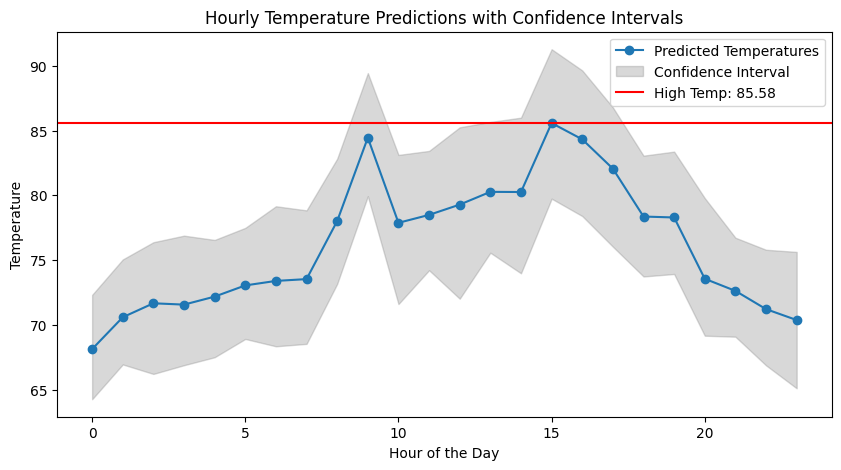

In [ ]:
def predict_and_plot_wconfid_bayesian(month, day, year, model):
    
    feature_cols = ['relativehumidity_2m', 'dewpoint_2m',  
                    'windspeed_10m', 'shortwave_radiation', 'temp_avg',
                    'forecast_temp(f)', 'forecast_relativehumidity_2m', 'forecast_precipitation', 
                    'forecast_windspeed_10m', 'forecast_shortwave_radiation','cloudcover', 'month_cos', 'day_cos']
    
    df_inputs = input(month, day, year)  # Replace with actual function
    df_inputs = df_inputs[feature_cols]
    df_inputs = df_inputs.fillna(0)

    input_shape = (5, len(feature_cols))  # Modify this as needed
    predicted_temps = []
    confidence_intervals = []
    var = []

    for i in range(24):  # Looping over 24 hours
        
        X = df_inputs.iloc[[i]]  # Slice DataFrame and convert to numpy array
        X = X[feature_cols].values  # Reshape array

        # Make multiple predictions and calculate confidence interval
        num_simulations = 100
        preds = [model.predict([X], verbose=0)[0][0] for _ in range(num_simulations)]
        mean_pred = np.mean(preds)
        var.append(np.var(preds))
        
        lower_bound = np.percentile(preds, 2.5)
        upper_bound = np.percentile(preds, 97.5)

        predicted_temps.append(mean_pred)
        confidence_intervals.append((lower_bound, upper_bound))

    high_temp = max(predicted_temps)
    
    print(f"Variances: {var}")

    plt.figure(figsize=(10, 5))
    plt.plot(range(24), predicted_temps, label='Predicted Temperatures', marker='o')
    
    lower_bounds, upper_bounds = zip(*confidence_intervals)
    plt.fill_between(range(24), lower_bounds, upper_bounds, color='gray', alpha=0.3, label='Confidence Interval')
    
    plt.axhline(y=high_temp, color='r', linestyle='-', label=f'High Temp: {high_temp:.2f}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Temperature')
    plt.title('Hourly Temperature Predictions with Confidence Intervals')
    plt.legend()
    plt.show()

# Usage example (make sure to replace 'best_bay_model' with the actual trained model)
predict_and_plot_wconfid_bayesian("10", "05", "2023", best_bay_model)
        

## Automation

### Automated Model Data Retrieval for Automated Trading

In [ ]:
def maxTemps(month, day, year, model):
    feature_cols = ['relativehumidity_2m', 'dewpoint_2m',  
                    'windspeed_10m', 'shortwave_radiation', 'temp_avg',
                    'forecast_temp(f)', 'forecast_relativehumidity_2m', 'forecast_precipitation', 
                    'forecast_windspeed_10m', 'forecast_shortwave_radiation','cloudcover', 'month_cos', 'day_cos']
    
    df_inputs = input(month, day, year)  # Replace with actual function
    df_inputs = df_inputs[feature_cols]
    df_inputs = df_inputs.fillna(0)

    input_shape = (1, len(feature_cols))  # Modify this as needed
    
    max_temps = []

    for sim in range(100):  # 100 Bayesian simulations
        predicted_temps = []
        
        for i in range(24):  # Looping over 24 hours
            X = df_inputs.iloc[[i]]  # Slice DataFrame and convert to numpy array
            X = X[feature_cols].values  # Reshape array
            pred = model.predict([X], verbose=0)[0][0]
            predicted_temps.append(pred)

        max_temps.append(max(predicted_temps))

    return max_temps

def interval(temp_interval, max_temps):
    lower, upper = temp_interval
    #round max_temps
    max_temps = [round(temp) for temp in max_temps]
    count = sum(lower <= temp <= upper for temp in max_temps)
    probability = count / len(max_temps)
    return probability





### Kalshi API

In [7]:
def login():
    url = 'https://demo-api.kalshi.co/trade-api/v2/login'
    payload = {
        "email": "marza@bu.edu",
        "password": "@leX5776"
    }
    headers = {
        "accept": "application/json",
        "content-type": "application/json"
    }
    response = requests.post(url, json=payload, headers=headers)
    if response.status_code == 200:
        print("Login Successful")
        return response.json()
    else:
        print("Login Failed")
        print(response.json())
        return None

def placeOrder(count):
    credentials = login()

    url = "https://demo-api.kalshi.co/trade-api/v2/portfolio/orders"

    payload = {
        "action": "buy",
        "client_order_id": f"{credentials['member_id']}",
        "count": f"{count}",
        "expiration_ts": 300,
        "side": "yes",
        "type": "market",
        "ticker": "highmia-23oct02",
        "Authorization": f"{credentials['token']}"
    }
    headers = {
        "accept": "application/json",
        "content-type": "application/json"
    }

    response = requests.post(url, json=payload, headers=headers)
    if response.status_code == 200:
        print("Order Placed")
        return response.json()
    else:
        print("Order Failed")
        print(response.json())
        return None




In [23]:
def placeOrder(month, day, cnt):
    guess = round(predcit_ffn(month, day, "2023", best_model))
    # print the guess for the day ... is ...
    print("The guess for the day " + f"{month}-{day}" " is: " + str(guess))
    
    config = kalshi_python.Configuration()
    config.host = 'https://demo-api.kalshi.co/trade-api/v2'
    kalshi_api = kalshi_python.ApiInstance(
        email='marza@bu.edu',
        password='@leX5776',
        configuration=config,
    )
    
    exchangeStatus = kalshi_api.get_exchange_status()
    if exchangeStatus.trading_active:
        month = (calendar.month_abbr[int(month)]).upper()
        eventTicker = f"HIGHMIA-23{month}{day}"
        print ("Event ticker: " + eventTicker)
        eventResponse = kalshi_api.get_event(eventTicker)
        eventResponse = eventResponse.to_dict()
        ifstart = True
        marketTicker = ''   
        for x in eventResponse['markets']:
            # Split the ticker by '-' and take the last part
            x = x['ticker']
            value = x.split('-')[-1]
            op = value[0]  
            value = float(value[1:])
            if(ifstart and op == 'T'):
                if(guess <= round(value - 1)):
                    marketTicker = x
                    break
                ifstart = False
            elif(op == 'B'):
                if(guess <= round(value + .5) and guess >= round(value - .5)):
                    marketTicker = x
                    break
            else:
                if(guess >= round(value + 1)):
                    marketTicker = x
                    break
        if(marketTicker != ''):
            print(marketTicker)
            orderUuid = str(uuid.uuid4())
            orderResponse = kalshi_api.create_order(CreateOrderRequest(
                ticker=marketTicker,
                action='buy',
                type='market',
                count= cnt,
                buy_max_cost= 65,
                expiration_ts = int(time.time()) + 300,
                client_order_id=orderUuid,
                side='yes',
            ))
            orderResponse = orderResponse.to_dict()
            status = orderResponse['order']['status']
            print('\nOrder submitted: ' + status)
        else:
            print("No market found")
    else:
        print("Exchange is closed")


def placeOrderNo(month, day, cnt):
    guess = round(predcit_ffn(month, day, "2023", best_model))
    # print the guess for the day ... is ...
    print("The guess for the day " + f"{month}-{day}" " is: " + str(guess))
    
    config = kalshi_python.Configuration()
    config.host = 'https://demo-api.kalshi.co/trade-api/v2'
    kalshi_api = kalshi_python.ApiInstance(
        email='marza@bu.edu',
        password='@leX5776',
        configuration=config,
    )
    
    exchangeStatus = kalshi_api.get_exchange_status()
    if exchangeStatus.trading_active:
        month = (calendar.month_abbr[int(month)]).upper()
        eventTicker = f"HIGHMIA-23{month}{day}"
        print ("Event ticker: " + eventTicker)
        eventResponse = kalshi_api.get_event(eventTicker)
        eventResponse = eventResponse.to_dict()
        ifstart = True
        marketTicker = []   
        print(eventResponse['markets'])
        for x in eventResponse['markets']:
            # Split the ticker by '-' and take the last part
            x = x['ticker']
            value = x.split('-')[-1]
            op = value[0]  
            value = float(value[1:])
            if(ifstart and op == 'T'):
                if(guess > round(value - 1)):
                    marketTicker.append(x)
                ifstart = False
            elif(op == 'B'):
                if(guess > round(value + .5) or guess < round(value - .5)):
                    marketTicker.append(x)
            else:
                if(guess < round(value + 1)):
                    marketTicker.append(x)
        print(marketTicker)
        #current time in seconds
        for x in marketTicker:
            print(x)
            orderUuid = str(uuid.uuid4())
            orderResponse = kalshi_api.create_order(CreateOrderRequest(
                ticker=x,
                action='buy',
                type='limit',
                no_price= 65,
                expiration_ts = int(time.time()) + 300,
                count= cnt,
                client_order_id=orderUuid,
                side='no',
            ))
            orderResponse = orderResponse.to_dict()
            status = orderResponse['order']['status']
            print('\nOrder submitted: ' + status)
            print(orderResponse)
    else:
        print("Exchange is closed")
    
def placeOrderAll(month, day, year, cnt, model):
    max_temps= maxTemps(month, day, year, model)     
    
    config = kalshi_python.Configuration()
    config.host = 'https://demo-api.kalshi.co/trade-api/v2'
    kalshi_api = kalshi_python.ApiInstance(
        email='marza@bu.edu',
        password='@leX5776',
        configuration=config,
    )
    
    exchangeStatus = kalshi_api.get_exchange_status()
    if exchangeStatus.trading_active:
        month = (calendar.month_abbr[int(month)]).upper()
        eventTicker = f"HIGHMIA-23{month}{day}"
        print ("Event ticker: " + eventTicker)
        eventResponse = kalshi_api.get_event(eventTicker)
        eventResponse = eventResponse.to_dict()
        ifstart = True
        yes = 0
        no = 0
        print(eventResponse['markets'])
        for x in eventResponse['markets']:
            # Split the ticker by '-' and take the last part
            x = x['ticker']
            value = x.split('-')[-1]
            op = value[0]  
            value = float(value[1:])
            if(ifstart and op == 'T'):
                p = interval((-30, value - 1), max_temps)
                yes = round(p*100)-5
                no = round((1-p)*100)-5
                ifstart = False
            elif(op == 'B'):
                p = interval((value - .5, value + .5), max_temps)
                yes = round(p*100)-5
                no = round((1-p)*100)-5
            else:
                p = interval((value + 1, 130), max_temps)
                yes = round(p*100)-5
                no = round((1-p)*100)-5
            #send yes trade
            print(x)
            print(yes)
            print(no)
            if(yes>0):
                orderUuid = str(uuid.uuid4())
                orderResponse = kalshi_api.create_order(CreateOrderRequest(
                    ticker=x,
                    action='buy',
                    type='limit',
                    yes_price= yes,
                    expiration_ts = int(time.time()) + (3600*20),
                    count= cnt,
                    client_order_id=orderUuid,
                    side='yes',
                ))
                orderResponse = orderResponse.to_dict()
                status = orderResponse['order']['status']
                print('\nOrder submitted: ' + status)
                print(orderResponse)
            #send no trade
            if(no>0):
                orderUuid = str(uuid.uuid4())
                orderResponse = kalshi_api.create_order(CreateOrderRequest(
                    ticker=x,
                    action='buy',
                    type='limit',
                    no_price= no,
                    expiration_ts = int(time.time()) + (3600*20),
                    count= cnt,
                    client_order_id=orderUuid,
                    side='no',
                    
                ))
                orderResponse = orderResponse.to_dict()
                status = orderResponse['order']['status']
                print('\nOrder submitted: ' + status)
                print(orderResponse)

    else:
        print("Exchange is closed")


    

    


In [26]:
placeOrderAll("10", "11", "2023", 100, best_bay_model)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Event ticker: HIGHMIA-23OCT11
[{'can_close_early': True, 'cap_strike': 84, 'category': '', 'close_time': '2023-10-12T03:59:00Z', 'custom_strike': None, 'event_ticker': '', 'expiration_time': '2023-10-18T14:00:00Z', 'expiration_value': '', 'floor_strike': None, 'last_price': 0, 'liquidity': 0, 'no_ask': 0, 'no_bid': 0, 'open_interest': 0, 'open_time': '2023-10-10T14:00:00Z', 'previous_price': 0, 'previous_yes_ask': 6, 'previous_yes_bid': 0, 'result': '', 'risk_limit_cents': 2500000, 'status': 'active', 'strike_type': 'less', 'subtitle': '83° or below', 'ticker': 'HIGHMIA-23OCT11-T84', 'title': '', 'volume': 0, 'volume_24h': 0, 'yes_ask': 100, 'yes_bid': 0}, {'can_close_early': True, 'cap_strike': 85, 'category': '', 'close_time': '2023-10-12T03:59:00Z', 'custom_strike': None, 'event_ticker': '', 'expiration_time': '2023-10-18T14:00:00Z', 'expiration_value': '', 'floor_strike': 84, 'last_price': 0, 'liquidity': 0, 'no_ask': 0, 'no_bid': 0, 'open_interest': 0, 'open_time': '2023-10-10T14:

## Imports

In [2]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
#from keras.models import load_model
from tensorflow.keras import backend as K
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
#ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import kalshi_python
from kalshi_python.models import *
import uuid
import calendar
import time
import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.model_selection import KFold